Decay rate of dipolar emitter
====================================
*01/2021: updated to pyGDM v1.1+*

In this example, we demonstrate how the decay rate of a dipolar emitter is influenced by the presence of dielectric nanostructures (for the theory in the framework of the GDM, see also [1]).
In the following we will therefore rasterscan a dipolar emitter oscillating at a frequency of wavelength $\lambda=500$nm in a plane 15nm above a small dielectric sphere ($n=2$) and calculate the modification of the dipole decay rate at each position.


[1] Wiecha, P. R. et al. *Decay Rate of Magnetic Dipoles near Non-magnetic Nanostructures*. **arXiv** 1707.07006 (2017) (https://arxiv.org/abs/1707.07006)
 

Simulation setup
--------------------

In [1]:
## --- load the modules
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import linear
from pyGDM2 import visu
from pyGDM2 import tools

import numpy as np
import matplotlib.pyplot as plt


## --- setup simulation
mesh = 'cube'
step = 7.0   # discretization in nm
L = 21       # cube side-length in nm
geometry = structures.rect_wire(step, L=L/step,H=L/step, W=L/step, mesh=mesh)
geometry.T[2] += step/2.

material = materials.dummy(2.0)

struct = structures.struct(step, geometry, material)
struct = structures.center_struct(struct)


## --- Setup environment (vacuum)
n1, n2 = 1.0, 1.0          # water on glass
dyads = propagators.DyadsQuasistatic123(n1=n1, n2=n2)


## --- Setup a dummy incident field 
## (field_generator is not used during the decay-rate calculation)
wavelengths = [500]
kwargs = dict()
efield_dummy = fields.efield(fields.plane_wave, wavelengths, kwargs)


## --- simulation instance
sim = core.simulation(struct, efield_dummy, dyads)

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 27/27 dipoles valid


Decay rate simulation
----------------------------------------------

Rasterscanning a 2D grid, we now we run the decay rate simulation for an electric as well as for a magnetic dipole transition (see [1] for details on the formalism).

**Note** that the first run of the respective LDOS calculation (E / H) can be slow because numba JIT-compiles the accelerated module from the python code. 

In [2]:
r_probe = tools.generate_NF_map_XY(-200,200,31, -200,200,31, Z0=40)

## --- electric dipole decay rate --> E-LDOS
ldos_e_x, ldos_e_y, ldos_e_z = core.decay_rate(sim, wavelength=400, r_probe=r_probe, component='E')
print('After numba-compilation, any further call of 'decay_rate' (at a different wavelength, different positions, ...) is much faster:')
ldos_e_x, ldos_e_y, ldos_e_z = core.decay_rate(sim, wavelength=500, r_probe=r_probe, component='E')

## --- magnetic dipole decay rate --> H-LDOS
ldos_h_x, ldos_h_y, ldos_h_z = core.decay_rate(sim, wavelength=500, r_probe=r_probe, component='H')

/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


E-LDOS at wl=400.0nm - K: 0.2s, Q: 3.2s, S: 2.8s, integrate: 0.0s, Done in 6.3s
After numba-compilation, the second call at a different wavelength (or different map...) is much faster:
E-LDOS at wl=500.0nm - K: 0.1s, Q: 0.0s, S: 0.0s, integrate: 0.0s, Done in 0.2s
H-LDOS at wl=500.0nm - K: 0.2s, Q: 1.9s, S: 2.0s, integrate: 0.0s, Done in 4.2s


plot the results for different orientations
------------------------------------------------------

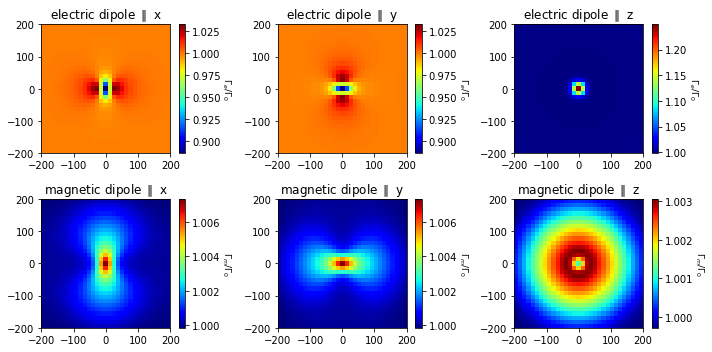

In [3]:
## list of dipole test orientations
eldos_list = [ldos_e_x, ldos_e_y, ldos_e_z]
hldos_list = [ldos_h_x, ldos_h_y, ldos_h_z]

plt.figure(figsize=(10,5))
for i, dp_orient in enumerate(['x', 'y', 'z']):
    
    plt.subplot(2,3,i+1, aspect='equal')
    plt.title(r"electric dipole $\parallel$ {}".format(dp_orient))
    im = visu.scalarfield(eldos_list[i], cmap='jet', show=False)
    cbar = plt.colorbar(im)
    cbar.set_label(r'$\Gamma_e / \Gamma_0$', rotation=270, labelpad=12, fontsize=9)
        
    plt.subplot(2,3,i+4, aspect='equal')
    plt.title(r"magnetic dipole $\parallel$ {}".format(dp_orient))
    im = visu.scalarfield(hldos_list[i], cmap='jet', show=False)
    cbar = plt.colorbar(im)
    cbar.set_label(r'$\Gamma_m / \Gamma_0$', rotation=270, labelpad=12, fontsize=9)
    
    

plt.tight_layout()

plt.show()

The first observation is the inverted contrast when comparing electric and magnetic dipole.
Another noteworthy observation is the much narrower confinement of the features in the case of an electric dipole compared to the magnetic transition. Furthermore, also the magnitude of the decay rate variation is much stronger for the electric dipole.
Both phenomena can be attributed to the more *direct* interaction of an electric dipole with the nano-structure, compared to the rather *indirect* magnetic response of the itself *non-magnetic* nano-sphere.